In [2]:
import json
fr=open("data/bitly_usagov/example.txt")
fr.readline()
records=[json.loads(line) for line in open("data/bitly_usagov/example.txt", encoding='utf8')]
records[0]['tz']
time_zones=[rec['tz'] for rec in records if 'tz' in rec]

In [9]:
len(time_zones)
time_zones

def get_counts(seq):
    counts={}
    for s in seq:
        if s in counts:
            counts[s]+=1 #{'America/New_York':2}
        else:
            counts[s]=1 #{'America/New_York':1}
    return counts
    
counts=get_counts(time_zones)
print(counts)
#print(counts['Europe/Dublin'])

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

In [28]:
#상위 10개 도시 출력
vk=[(count, tz) for tz, count in counts.items()]
#vk=[(tz,count) for tz, count in counts.items()]
vk.sort()
print(vk[-10:])

[(33, 'America/Sao_Paulo'), (35, 'Europe/Madrid'), (36, 'Pacific/Honolulu'), (37, 'Asia/Tokyo'), (74, 'Europe/London'), (191, 'America/Denver'), (382, 'America/Los_Angeles'), (400, 'America/Chicago'), (521, ''), (1251, 'America/New_York')]


In [29]:
from collections import Counter
counts=Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [36]:
import pandas as pd
frame=pd.DataFrame(records)
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [39]:
frame['tz']
#frame['tz'].value_counts()
#'' != NaN
#'' : 바구니에 과일이 없다
#NaN() : 바구니 조차도 없다

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

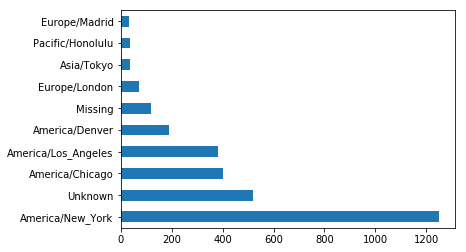

In [73]:
#len(frame[frame['tz']=='']) #'' 몇 건?521
#len(frame[frame['tz'].isnull()]) #NaN 몇 건?120

#frame['tz'].value_counts()
#clean_tz=frame['tz'].fillna('Missing')
#clean_tz.value_counts()

clean_tz[clean_tz=='']='Unknown'
clean_tz
tz_counts=clean_tz.value_counts()
tz_counts[:10]
tz_counts[:10].plot(kind='barh')
#tz_counts[:10]

In [93]:
# len(frame[frame.a.isnull()])
# len(frame) #3560
# frame.info() #a:3440(NaN 120)
results=pd.Series([x.split()[0] for x in frame.a.dropna()])
results
#"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11".split()

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
5                  Mozilla/5.0
6                  Mozilla/5.0
7                  Mozilla/5.0
8                   Opera/9.80
9                  Mozilla/5.0
10                 Mozilla/5.0
11                 Mozilla/5.0
12                 Mozilla/5.0
13                 Mozilla/5.0
14                 Mozilla/5.0
15                 Mozilla/5.0
16                 Mozilla/5.0
17      GoogleMaps/RochesterNY
18                 Mozilla/5.0
19                 Mozilla/5.0
20                 Mozilla/5.0
21                 Mozilla/4.0
22                 Mozilla/5.0
23                 Mozilla/5.0
24                 Mozilla/5.0
25                 Mozilla/5.0
26                 Mozilla/5.0
27                 Mozilla/5.0
28                 Mozilla/5.0
29                 Mozilla/5.0
                 ...          
3410               Mozilla/5.0
3411    

In [100]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [105]:
cframe=frame[frame.a.notnull()]

In [122]:
import numpy as np
os=np.where(cframe.a.str.contains("Windows"),
         "Windows","Not Windows")
os
#type(cframe.a.str)

#print(np.where(2>1, "참", "거짓"))


array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [130]:
by_tz_os=cframe.groupby(['tz', os])
by_tz_os
by_tz_os.size()


tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [134]:
my=[2,1,9,7]
pd.Series(my).argsort()

0    1
1    0
2    3
3    2
dtype: int64

In [135]:
import seaborn as sns

In [143]:
tips=sns.load_dataset('tips')
tips.shape
# tips
# tips['size'].value_counts()

(244, 7)

In [145]:
tips_filtered=tips.groupby('size').
filter(lambda x:x['size'].count()>=30)

tips_filtered.shape

(231, 7)

In [147]:
tips_filtered['size'].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

AttributeError: 'DataFrameGroupBy' object has no attribute 'tips'

In [148]:
from datetime import datetime
#date:날짜, time:시간, datetime:날짜+시간

In [157]:
t1=datetime.now()
print(t1)
t2=datetime.today()
print(t2)
print(datetime(2019,7,12))

2019-07-12 13:40:36.433577
2019-07-12 13:40:36.433577
2019-07-12 00:00:00


In [161]:
type(datetime.now()-datetime(2019, 8, 15))

datetime.timedelta

In [163]:
t1=datetime.now()
t2=datetime(1990,1,1)
t1-t2

datetime.timedelta(days=10784, seconds=49432, microseconds=359635)

In [175]:
ebola=pd.read_csv("data/country_timeseries.csv")
#ebola.info()
#to_datetime()
ebola['date_dt']=pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

In [183]:
test_df1=pd.DataFrame({
    'order_day':['07/12/19','08/12/19','09/12/19']
})
test_df1

#pd.to_datetime(test_df1['order_day'])#default변환

#pd.to_datetime(test_df1['order_day'], format="%m/%d/%y")#default와 같음
#print(pd.to_datetime(test_df1['order_day'], format="%d/%m/%y"))
print(pd.to_datetime(test_df1['order_day'], format="%y/%m/%d"))

0   2007-12-19
1   2008-12-19
2   2009-12-19
Name: order_day, dtype: datetime64[ns]


In [186]:
test_df2=pd.DataFrame({
    'order_day':['12-07-19','12-08-19','12-09-19']
})
# 2019-09-12
pd.to_datetime(test_df2['order_day'], format="%d-%m-%y")

0   2019-07-12
1   2019-08-12
2   2019-09-12
Name: order_day, dtype: datetime64[ns]

In [187]:
now=datetime.now()
print(now)

2019-07-12 14:21:11.125597


In [191]:
now.strftime('%y-%m-%d')
now.strftime('%Y-%m-%d')
now.strftime('%H:%M:%S')

'14:21:11'

In [204]:
ebola1=pd.read_csv("data/country_timeseries.csv",
                   parse_dates=['Date'])
#ebola1.info()
ebola1['Date'][0].year
ebola1['Date'][0].month
ebola1['Date'][0].day

5

In [205]:
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB


In [208]:
ebola1['date_dt']=ebola1['Date']

In [210]:
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(16), int64(1)
memory usage: 

In [223]:
ebola1['year']=ebola1['date_dt'].dt.year
ebola1[['Date', 'date_dt', 'year']].head()
#x,y=1,2
ebola1['month'], ebola1['day']=ebola1['date_dt'].dt.month, ebola1['date_dt'].dt.day
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                

In [227]:
ebola1.iloc[-5: , :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [232]:
ebola1['outbreak_d']=ebola1['date_dt']-ebola1['date_dt'].min()
ebola1.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day,outbreak_d
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015,1,5,289 days
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015,1,4,288 days
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015,1,3,287 days
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015,1,2,286 days
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014,12,31,284 days


In [236]:
banks=pd.read_csv("data/banklist.csv")
banks_no_dates=pd.read_csv("data/banklist.csv")
#banks.head()
#banks.info()
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


In [237]:
banks=pd.read_csv("data/banklist.csv", parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


In [243]:

banks['closing_quarter'], banks['closing_year']=
banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year

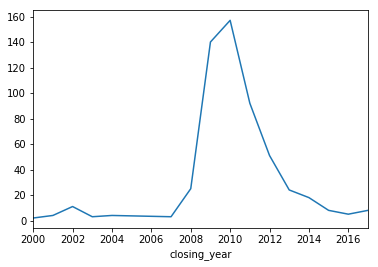

In [247]:
closing_year=banks.groupby(['closing_year']).size()

closing_year_q=banks.groupby(['closing_year', 'closing_quarter']).size()
closing_year_q

closing_year.plot()

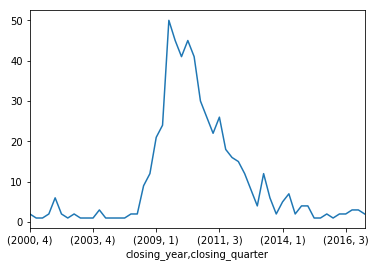

In [248]:
closing_year_q.plot()